<a href="https://colab.research.google.com/github/Hozard0/IT-academy-practical-/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Данные содержат информацию сети доставки о выполненных заказах.

store_id — ID (уникальный номер) филиала

order_id — ID заказа

product_id — ID товара

price — цена за товар

profit — выгода, получаемая компанией с заказа

delivery_distance — расстояние от филиала до пункта доставки

order_start_prepare — дата и время начала приготовления заказа

planned_prep_time — планируемое время готовности заказа (в минутах)

order_ready — дата и время выполнения заказа

 region_id — ID региона филиала

In [ ]:
# Капушев Сергей, Базовый Вариант
import pandas as pd   # основная библеотека для работы
import datetime

# Ссылка на csv файлы с данными
url_orders = "https://gist.githubusercontent.com/Hozard0/d757bb5e966a05bdd878d32558d82995/raw/ab86ebf2e4f0d01d7ef5480969cb63b54b3da1c6/orders.csv"
url_products = "https://gist.githubusercontent.com/Hozard0/d757bb5e966a05bdd878d32558d82995/raw/ab86ebf2e4f0d01d7ef5480969cb63b54b3da1c6/products.csv"
url_regions = "https://gist.githubusercontent.com/Hozard0/d757bb5e966a05bdd878d32558d82995/raw/ab86ebf2e4f0d01d7ef5480969cb63b54b3da1c6/gistfile1.txt"
url_stores = "https://gist.githubusercontent.com/Hozard0/d757bb5e966a05bdd878d32558d82995/raw/ab86ebf2e4f0d01d7ef5480969cb63b54b3da1c6/gistfile2.txt"

# Передадим csv файлы в DataFrame
df_orders = pd.read_csv(url_orders)
df_products = pd.read_csv(url_products)
df_regions = pd.read_csv(url_regions)
df_stores = pd.read_csv(url_stores)

# Просмотр первых пяти строк для понятия типов данных в колонках
df_orders.head()


,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id
0,0,5014,20562761,41,7.04,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F
1,1,5014,20562761,31,23.45,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F
2,2,3856,20562753,7,51.94,30.336,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F
3,3,3856,20562753,4,188.84,30.336,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F
4,4,10825,20562723,12,85.99,43.608,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F


# Вывод по пропускам


- Почти во всех колонках нет пропусков, кроме profit (2089 пропусков), date_create(14 пропусков), order_start_prepare(1990 пропусков), order_ready(2001 пропуск).

In [ ]:
# Просмотр кол-ва non-null значений в основном датафрейме
df_orders.info()

# Конвертируем колонки «order_start_prepare» и «order_ready» в формат datetime
order_start_prepare = pd.to_datetime(df_orders['order_start_prepare'])
order_ready = pd.to_datetime(df_orders['order_ready'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20000 non-null  int64  
 1   store_id             20000 non-null  int64  
 2   order_id             20000 non-null  int64  
 3   product_id           20000 non-null  int64  
 4   price                20000 non-null  float64
 5   profit               17911 non-null  float64
 6   delivery_distance    20000 non-null  int64  
 7   date_create          19986 non-null  object 
 8   order_start_prepare  18010 non-null  object 
 9   planned_prep_time    20000 non-null  float64
 10  order_ready          17999 non-null  object 
 11  order_pickup         20000 non-null  object 
 12  region_id            20000 non-null  int64  
 13  status_id            20000 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.1+ MB


# Добавление в основной датафрейм дополнительные по id: store_name, product_name, region_name. Замена пропусков в «price» на минимальную цену товара. А также создание новой колонки «items_count», в которой содержится информация о количестве товаров в каждом заказе

In [56]:
# Добавление к основному датафрейму неосновных
df_main = df_orders.merge(df_stores)
df_main = df_main.merge(df_products)
df_main = df_main.merge(df_regions)

# Замена пропусков в "price" на минимальную цену товаров (но на основе info(), пропусков - нет)

min_price = df_main.groupby('product_name')['price'].min()
df_main['price'].fillna(min_price, inplace = True)


# Cоздание новой колонки «items_count»
df_main['items_count'] = (df_main.groupby(['order_id', 'date_create'])['product_id'].transform('count'))
df_main

df_main.head()

<ipython-input-56-04d3179bc618>:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,store_name,product_name,delivery_region_name,items_count
0,0,5014,20562761,41,7.04,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,KFC на Пушкинской,Nachos,Sovetsky District,2.0
1,1,5014,20562761,31,23.45,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,KFC на Пушкинской,Curry,Sovetsky District,2.0
2,14,5014,20562585,28,16.66,49.770,536,2024-09-05 15:11:38,2024-09-05 15:11:49,15.0,2024-09-05 15:25:54,05-09-2024 15:53:54,683,F,KFC на Пушкинской,Lasagna,Sovetsky District,3.0
3,15,5014,20562585,34,2.77,49.770,536,2024-09-05 15:11:38,2024-09-05 15:11:49,15.0,2024-09-05 15:25:54,05-09-2024 15:53:54,683,F,KFC на Пушкинской,Pie,Sovetsky District,3.0
4,16,5014,20562585,38,66.85,49.770,536,2024-09-05 15:11:38,2024-09-05 15:11:49,15.0,2024-09-05 15:25:54,05-09-2024 15:53:54,683,F,KFC на Пушкинской,Meatballs,Sovetsky District,3.0


# Гистограмма для product_name

Вывод: меньше всего заказывают carrot(84), а больше всего Nachos и Smoothie (132)

In [ ]:
import plotly.express as px   # библиотека для гистограммы

# гистограмма для product_name
fig = px.histogram(df_main['product_name'])
fig.show()



# График график плотности (kdeplot) для «order_price»


In [ ]:
import seaborn as sns # библиотека для графика плотности
import matplotlib.pyplot as plt # еще одна библиотека

# Построение графика плотности
plt.figure(figsize=(10, 6))
sns.kdeplot(df_main[df_main.order_price<5000].order_price, shade=True)
plt.title('График плотности для order_price')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'order_price'

<Figure size 1000x600 with 0 Axes>

# Создание колонки order_price, равная сумме стоимости всех товаров в заказе.


In [ ]:
# Создание колонки order_price
order_price = df_main.groupby('order_id')['price'].sum().reset_index()

# Переименовываем колонку
order_price.rename(columns={'price': 'order_price'}, inplace=True)

# Объединяем с исходным DataFrame df_orders
df_main_price = pd.merge(df_orders, order_price, on='order_id', how='left')

df_main_price.head(10)



,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,order_price
0,0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,30.49
1,1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,30.49
2,2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,NaN
3,3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,NaN
4,4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F,NaN
5,5,5640,20562673,27,21.03,32.8640,2611,2024-09-05 15:19,2024-09-05 15:19:05,20.0,2024-09-05 15:35:25,05-09-2024 16:03:25,709,F,NaN
6,6,5640,20562673,43,3.65,32.8640,2611,2024-09-05 15:19,2024-09-05 15:19:05,20.0,2024-09-05 15:35:25,05-09-2024 16:03:25,709,F,NaN
7,7,7283,20562665,62,14.02,11.0600,1041,2024-09-05 15:18:39,NaN,15.0,2024-09-05 15:35:33,05-09-2024 16:03:33,707,F,NaN
8,8,8535,20562639,10,30.28,11.3128,1749,2024-09-05 15:16:47,2024-09-05 15:16:52,10.0,2024-09-05 15:20:15,05-09-2024 15:48:15,685,F,NaN
9,9,8535,20562639,46,12.96,11.3128,1749,2024-09-05 15:16:47,2024-09-05 15:16:52,10.0,2024-09-05 15:20:15,05-09-2024 15:48:15,685,F,NaN


# Анализ одной переменной
Статистические показатели

In [ ]:
# Статистические показатели
df_main.describe()


Графики histplot для дискретных признаков, kdeplot(из seaborn) для непрерывных (цена заказа, расстояние, выгода, ожидаемое время)
И kdeplot для переменных profit, delivery_distance, order_price и planned_prep_time

In [ ]:
# histplot для дискретных признаков
plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_main['store_name'], bins=30, kde=True)
plt.title('Store Names')

plt.subplot(2, 3, 2)
sns.histplot(df_main['items_count'], bins=30, kde=True)
plt.title('Item Count')

plt.subplot(2, 3, 3)
sns.histplot(df_main['delivery_region_name'], bins=30, kde=True)
plt.title('Region Names')

plt.tight_layout()
plt.show()

In [ ]:
# Kdeplot для непрерывных признаков
plt.figure(figsize=(16, 8))

# Kdeplot для profit
plt.subplot(2, 2, 1)
sns.kdeplot(df_main['profit'], fill=True)
plt.title('Density of Profit')

# Kdeplot для delivery_distance
plt.subplot(2, 2, 2)
sns.kdeplot(df_main['delivery_distance'], fill=True)
plt.title('Density of Delivery Distance')

# Kdeplot для order_price
plt.subplot(2, 2, 3)
sns.kdeplot(df_main_price['order_price'], fill=True)
plt.title('Density of Order Price')

# Kdeplot для planned_prep_time
plt.subplot(2, 2, 4)
sns.kdeplot(df_main['planned_prep_time'], fill=True)
plt.title('Density of Planned Prep Time')

plt.tight_layout()
plt.show()

# Анализ на наличие выбросов в данных

In [ ]:
def outlier_IQR_search(data, feature, threshold = 1.5):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    low = data[feature].quantile(0.25) - (IQR * threshold)
    up = data[feature].quantile(0.75) + (IQR * threshold)
    borders = (low, up)
    outliers = pd.concat([data[feature] < low, data[feature] > up], axis=1)
    outliers_index = outliers.any(axis=1)
    num_outliers = outliers_index.value_counts().get(1, 0)
    print('Количество выбросов в данных:', num_outliers)
    print('Доля выбросов:', num_outliers/len(outliers_index))
    return outliers_index, borders
outliers_price, borders = outlier_IQR_search(df_main, 'profit')

Количество выбросов в данных: 292
Доля выбросов: 0.0362417773364776


<ipython-input-8-91383a7a3526>:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Избавление от NaN-значений и аномалий

In [ ]:
# Заполнение NaN средним значением
df_main['profit'].fillna(df_main['profit'].mean(), inplace=True)

# Удаление аномалий с использованием метода IQR
Q1 = df_main['profit'].quantile(0.25)
Q3 = df_main['profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = df_main[(df_main['profit'] >= lower_bound) & (df_main['profit'] <= upper_bound)]

<ipython-input-9-3de0fa9897ea>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# Создание целевой переменной prepared_on_time

In [ ]:
# Создание переменных для вычитания
order_start_prepare = pd.to_datetime(df_main['order_start_prepare'])
order_ready = pd.to_datetime(df_main['order_ready'])

# Создание колоннок и перевод в минуты + выражение
df_main['actual_time'] = (order_ready - order_start_prepare).dt.seconds // 60
df_main['prepared_prep_time'] = df_main['actual_time'] - df_main['planned_prep_time']

# Сравниваем время
df_main['prepared_on_time'] = (df_main['prepared_prep_time'] < df_main['actual_time']).astype(int)

# Удаляем лишние колоны
df_main.drop('actual_time', axis = 1)


# Вывод
df_main


,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,...,order_pickup,region_id,status_id,store_name,product_name,delivery_region_name,items_count,actual_time,prepared_prep_time,prepared_on_time
0,0,29,20562761,41,7.04,545,577,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,...,05-09-2024 16:00:00,683,F,KFC на Пушкинской,Nachos,Sovetsky District,2.0,6.0,-9.0,1
1,1,29,20562761,31,23.45,545,577,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,...,05-09-2024 16:00:00,683,F,KFC на Пушкинской,Curry,Sovetsky District,2.0,6.0,-9.0,1
2,14,29,20562585,28,16.66,573,47,2024-09-05 15:11:38,2024-09-05 15:11:49,15.0,...,05-09-2024 15:53:54,683,F,KFC на Пушкинской,Lasagna,Sovetsky District,3.0,14.0,-1.0,1
3,15,29,20562585,34,2.77,573,47,2024-09-05 15:11:38,2024-09-05 15:11:49,15.0,...,05-09-2024 15:53:54,683,F,KFC на Пушкинской,Pie,Sovetsky District,3.0,14.0,-1.0,1
4,16,29,20562585,38,66.85,573,47,2024-09-05 15:11:38,2024-09-05 15:11:49,15.0,...,05-09-2024 15:53:54,683,F,KFC на Пушкинской,Meatballs,Sovetsky District,3.0,14.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,19977,9,20535855,11,23.20,425,561,2024-09-03 15:03:17,2024-09-03 15:03:38,25.0,...,03-09-2024 15:46:05,683,F,KFC в ТЦ Гринвич,Pasta,Sovetsky District,6.0,NaN,NaN,0
8053,19978,9,20535855,63,8.91,425,561,2024-09-03 15:03:17,2024-09-03 15:03:38,25.0,...,03-09-2024 15:46:05,683,F,KFC в ТЦ Гринвич,Mozzarella Sticks,Sovetsky District,6.0,NaN,NaN,0
8054,19979,20,20535851,44,141.28,326,1380,2024-09-03 15:04:20,2024-09-03 15:04:37,15.0,...,03-09-2024 15:44:32,695,F,Starbucks на Патриарших прудах,BBQ Ribs,Severny District,2.0,11.0,-4.0,1
8055,19980,20,20535851,18,16.36,326,1380,2024-09-03 15:04:20,2024-09-03 15:04:37,15.0,...,03-09-2024 15:44:32,695,F,Starbucks на Патриарших прудах,Waffle,Severny District,2.0,11.0,-4.0,1


# Корреляция между всеми числовыми признаками

<Axes: >

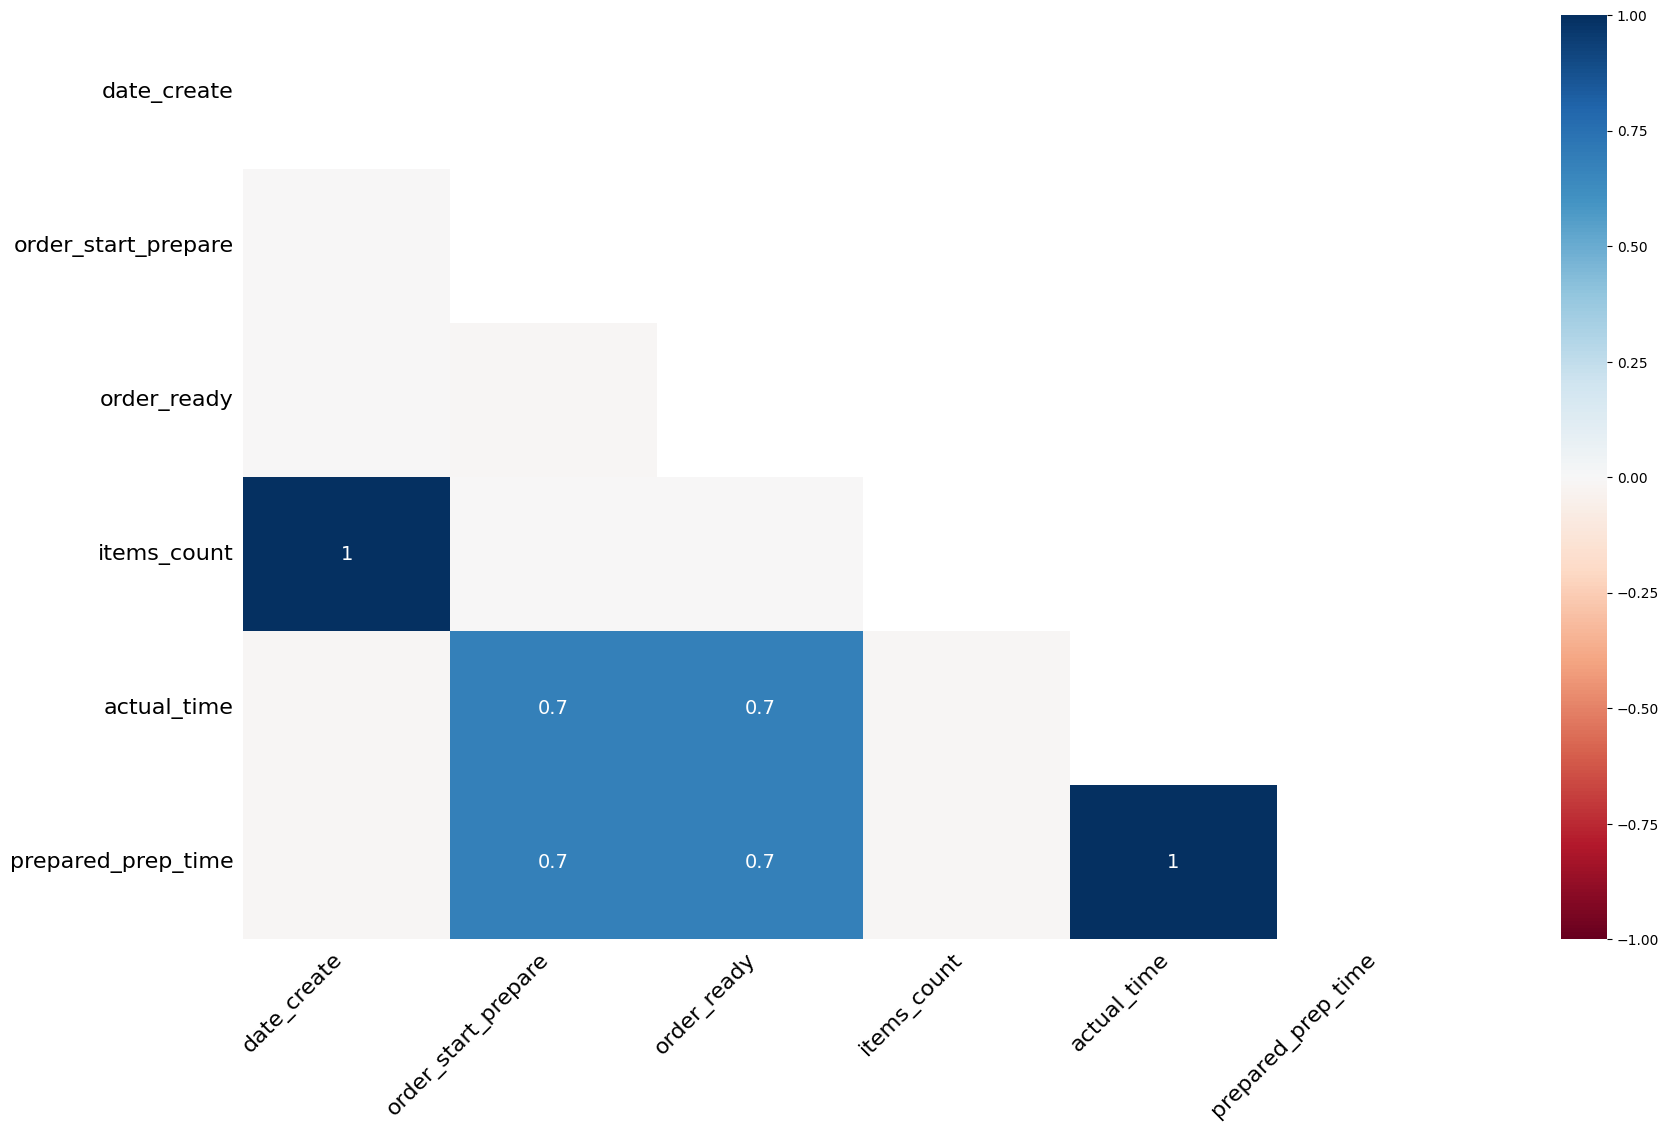

In [ ]:
# библиотека для корреляции и визуализации
import missingno as msno

msno.heatmap(df_main)

# Удаление некоторых колонок и дубликатов

In [57]:
# Удаление не нужных столбцов
df_main = df_main.drop(['Unnamed: 0'], axis=1)
df_main = df_main.drop('product_id', axis = 1)
df_main = df_main.drop('price', axis = 1)
df_main = df_main.drop('product_name', axis = 1)

# удаляем дубликаты
df_main = df_main.drop_duplicates().reset_index(drop=True)

# Смотрим финальную работу :)
df_main.head()

,store_id,order_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,store_name,delivery_region_name,items_count
0,5014,20562761,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,KFC на Пушкинской,Sovetsky District,2.0
1,5014,20562585,49.770,536,2024-09-05 15:11:38,2024-09-05 15:11:49,15.0,2024-09-05 15:25:54,05-09-2024 15:53:54,683,F,KFC на Пушкинской,Sovetsky District,3.0
2,10489,20562577,27.650,314,2024-09-05 15:11:58,2024-09-05 15:12:07,20.0,2024-09-05 15:29:10,05-09-2024 15:57:10,683,F,KFC на Тверской,Sovetsky District,2.0
3,4360,20562539,NaN,1863,2024-09-05 15:09:36,2024-09-05 15:10:09,25.0,2024-09-05 15:28:43,05-09-2024 15:56:43,707,F,KFC на Арбате,Kirovsky District,2.0
4,5863,20562521,34.760,3868,2024-09-05 15:07:08,2024-09-05 15:07:58,15.0,2024-09-05 15:16:50,05-09-2024 15:44:50,703,F,KFC на Лубянке,Oktyabrsky District,2.0
